#### **Preprocessing Data (Menyeimbangkan Data menggunakan SMOTE)**

#### - Koneksi Ke Database

In [27]:
import pandas as pd

import mysql.connector

# Koneksi ke MySQL database
conn = mysql.connector.connect(
  host='localhost',
  user='root',
  password='',
  database='psd'
)

# Ambil nama kolom
cursor = conn.cursor()
cursor.execute("SHOW COLUMNS FROM iris_full_1")
columns = cursor.fetchall()

# Ambil seluruh isi tabel
df_iris = pd.read_sql("SELECT * FROM iris_full_1", conn)
print("\nIsi tabel iris:")
print(df_iris)

# Tutup koneksi
conn.close()


Isi tabel iris:
      id           Class  sepal length  sepal width  petal length  petal width
0     36     Iris-setosa           5.0          3.2           1.2          0.2
1     37     Iris-setosa           5.5          3.5           1.3          0.2
2     38     Iris-setosa           4.9          3.1           1.5          0.1
3     39     Iris-setosa           4.4          3.0           1.3          0.2
4     40     Iris-setosa           5.1          3.4           1.5          0.2
..   ...             ...           ...          ...           ...          ...
110  146  Iris-virginica           6.7          3.0           5.2          2.3
111  147  Iris-virginica           6.3          2.5           5.0          1.9
112  148  Iris-virginica           6.5          3.0           5.2          2.0
113  149  Iris-virginica           6.2          3.4           5.4          2.3
114  150  Iris-virginica           5.9          3.0           5.1          1.8

[115 rows x 6 columns]


C:\Users\ahabi\AppData\Local\Temp\ipykernel_26728\3704638793.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_iris = pd.read_sql("SELECT * FROM iris_full_1", conn)


#### - Visualisi Data menggunakan PCA

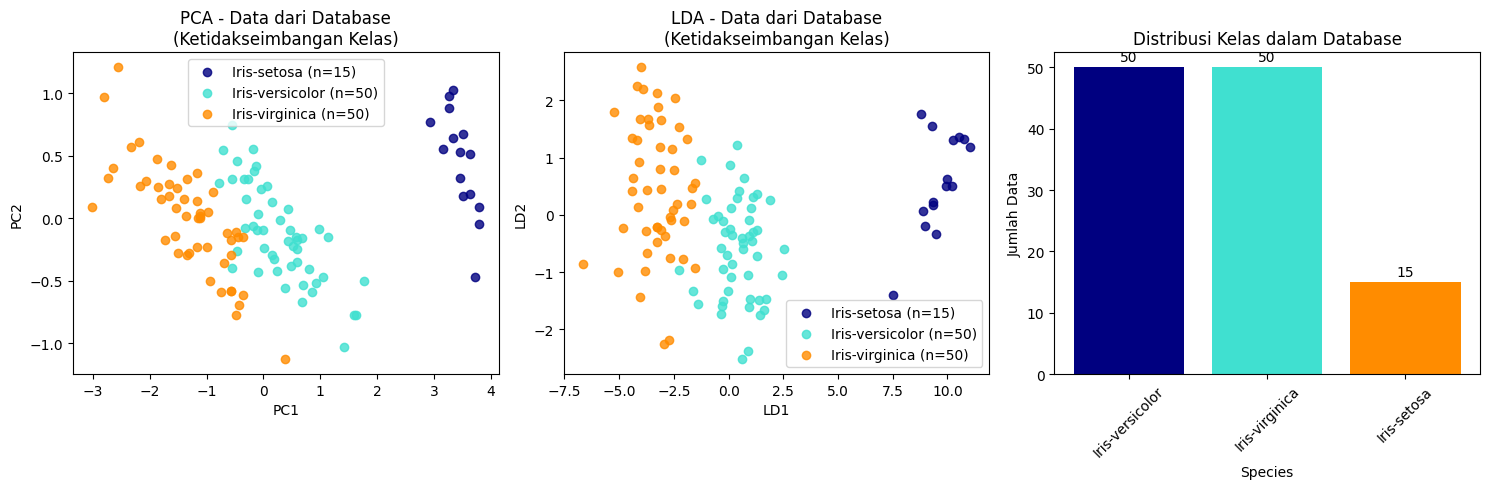


Explained variance ratio (database): [0.8962252 0.0647599]


In [28]:
# Visualisasi menggunakan data dari database (yang sebenarnya memiliki ketidakseimbangan)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

# Menggunakan data dari database (df_iris)
# Persiapkan data features (X) dan target (y)
# KODE BARU YANG BENAR
X_db = df_iris[['sepal length', 'sepal width', 'petal length', 'petal width']].values
y_db = df_iris['Class'].values # Kolom label Anda bernama 'class', bukan 'Species'

# Mapping species ke angka untuk visualisasi
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_numeric = np.array([species_mapping[species] for species in y_db])
target_names_db = list(species_mapping.keys())

# PCA untuk data database
pca_db = PCA(n_components=2)
X_r_db = pca_db.fit(X_db).transform(X_db)

# LDA untuk data database
lda_db = LinearDiscriminantAnalysis(n_components=2)
X_r2_db = lda_db.fit(X_db, y_numeric).transform(X_db)

# Visualisasi data dari database
plt.figure(figsize=(15, 5))

# Plot PCA
plt.subplot(1, 3, 1)
colors = ["navy", "turquoise", "darkorange"]
for color, i, target_name in zip(colors, [0, 1, 2], target_names_db):
    mask = y_numeric == i
    plt.scatter(X_r_db[mask, 0], X_r_db[mask, 1], color=color, alpha=0.8, 
                label=f"{target_name} (n={np.sum(mask)})")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA - Data dari Database\n(Ketidakseimbangan Kelas)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot LDA
plt.subplot(1, 3, 2)
for color, i, target_name in zip(colors, [0, 1, 2], target_names_db):
    mask = y_numeric == i
    plt.scatter(X_r2_db[mask, 0], X_r2_db[mask, 1], color=color, alpha=0.8,
                label=f"{target_name} (n={np.sum(mask)})")
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA - Data dari Database\n(Ketidakseimbangan Kelas)")
plt.xlabel("LD1")
plt.ylabel("LD2")

# Plot distribusi kelas
plt.subplot(1, 3, 3)
# KODE BARU (BENAR)
species_counts = df_iris['Class'].value_counts()
plt.bar(species_counts.index, species_counts.values, color=['navy', 'turquoise', 'darkorange'])
plt.title("Distribusi Kelas dalam Database")
plt.xlabel("Species")
plt.ylabel("Jumlah Data")
plt.xticks(rotation=45)
for i, v in enumerate(species_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()
print(f"\nExplained variance ratio (database): {pca_db.explained_variance_ratio_}")

#### - Menggunakan SMOTE untuk penyeimbangan Data

In [29]:
# Penyeimbangan Data menggunakan SMOTE (Synthetic Minority Over-sampling Technique)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
from imblearn.over_sampling import SMOTE
from collections import Counter

# Koneksi ke database dan ambil data iris
conn = mysql.connector.connect(
  host='localhost',
  user='root',
  password='',
  database='psd'
)

df = pd.read_sql("SELECT * FROM iris_full_1", conn)
conn.close()

# Persiapkan data untuk SMOTE
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target

print("=== ANALISIS DATA SEBELUM SMOTE ===")
print("Distribusi kelas sebelum SMOTE:")
print(Counter(y))
print(f"Total sampel sebelum SMOTE: {len(y)}")
print(f"Jumlah fitur: {X.shape[1]}")

=== ANALISIS DATA SEBELUM SMOTE ===
Distribusi kelas sebelum SMOTE:
Counter({'Iris-versicolor': 50, 'Iris-virginica': 50, 'Iris-setosa': 15})
Total sampel sebelum SMOTE: 115
Jumlah fitur: 5


C:\Users\ahabi\AppData\Local\Temp\ipykernel_26728\1527243385.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM iris_full_1", conn)


In [30]:
# Terapkan SMOTE untuk menyeimbangkan data
print("\n=== PENERAPAN SMOTE ===")

# Inisialisasi SMOTE dengan random_state untuk reproducibility
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi kelas setelah SMOTE:")
print(Counter(y_resampled))
print(f"Total sampel setelah SMOTE: {len(y_resampled)}")

# Konversi hasil SMOTE kembali ke DataFrame untuk analisis lebih lanjut
columns_names = X.columns.tolist()
df_resampled = pd.DataFrame(X_resampled, columns=columns_names)
df_resampled['Class'] = y_resampled

print("\nContoh data sintetis yang dihasilkan SMOTE:")
print(df_resampled.tail(10))  # Tampilkan 10 baris terakhir yang kemungkinan data sintetis


=== PENERAPAN SMOTE ===
Distribusi kelas setelah SMOTE:
Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})
Total sampel setelah SMOTE: 150

Contoh data sintetis yang dihasilkan SMOTE:
     id  sepal length  sepal width  petal length  petal width        Class
140  38      4.932654     3.230616      1.434692     0.165308  Iris-setosa
141  48      4.999311     3.485222      1.457044     0.200000  Iris-setosa
142  48      4.964584     3.460417      1.452083     0.200000  Iris-setosa
143  45      4.811648     3.031062      1.419414     0.303883  Iris-setosa
144  48      5.191174     3.622267      1.484453     0.200000  Iris-setosa
145  46      5.024196     3.597856      1.549464     0.225268  Iris-setosa
146  44      4.584123     3.107938      1.346031     0.246031  Iris-setosa
147  49      4.834700     3.258675      1.400000     0.200000  Iris-setosa
148  38      4.420847     3.006949      1.296526     0.200000  Iris-setosa
149  46      4.982110     3.485627      1.


=== VISUALISASI HASIL SMOTE ===


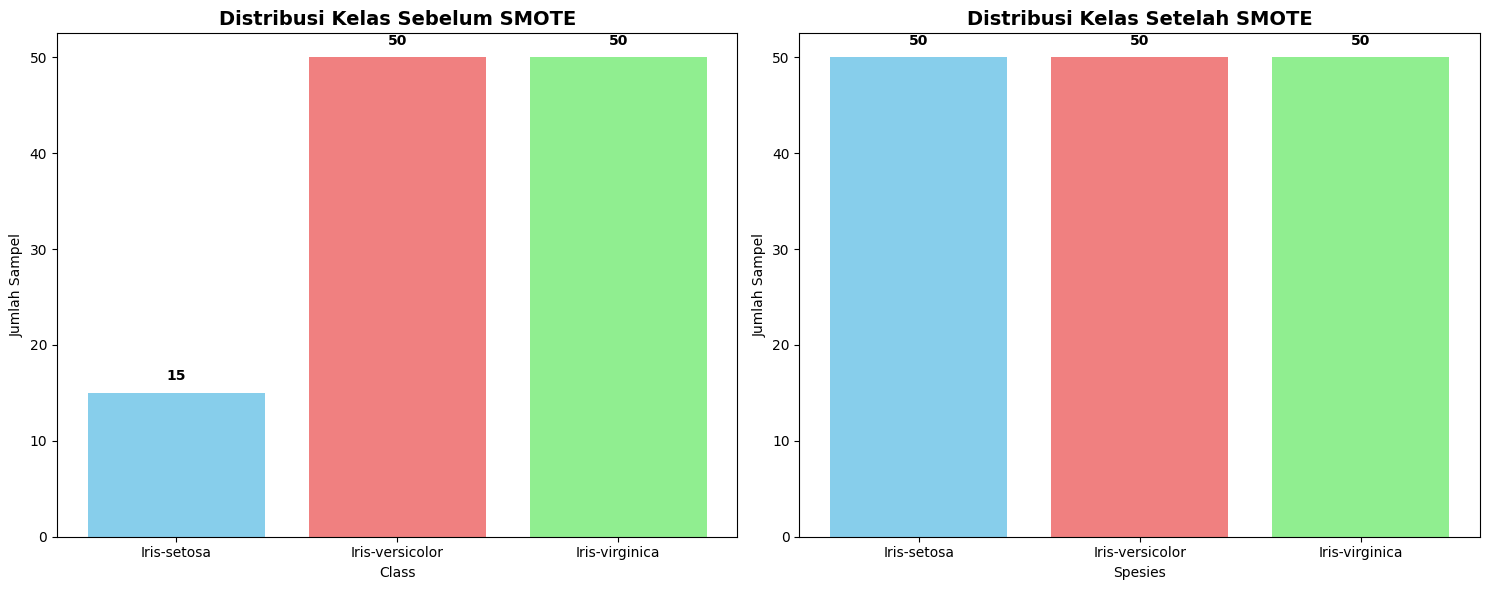


Tabel Perbandingan:
           Spesies  Sebelum SMOTE  Setelah SMOTE  Sampel Sintetis Ditambahkan
0      Iris-setosa             15             50                           35
1  Iris-versicolor             50             50                            0
2   Iris-virginica             50             50                            0


In [ ]:
# Visualisasi perbandingan data sebelum dan sesudah SMOTE
print("\n=== VISUALISASI HASIL SMOTE ===")

# Buat subplot untuk perbandingan
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot distribusi kelas sebelum SMOTE
before_counts = Counter(y)
species_names = list(before_counts.keys())
before_values = list(before_counts.values())

bars1 = axes[0].bar(species_names, before_values, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0].set_title('Distribusi Kelas Sebelum SMOTE', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Jumlah Sampel')
axes[0].set_xlabel('Class')

# Tambahkan label nilai di atas bar
for bar, value in zip(bars1, before_values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                str(value), ha='center', va='bottom', fontweight='bold')

# Plot distribusi kelas setelah SMOTE
after_counts = Counter(y_resampled)
after_values = list(after_counts.values())

bars2 = axes[1].bar(species_names, after_values, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_title('Distribusi Kelas Setelah SMOTE', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Jumlah Sampel')
axes[1].set_xlabel('Spesies')

# Tambahkan label nilai di atas bar
for bar, value in zip(bars2, after_values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabel perbandingan
print("\nTabel Perbandingan:")
comparison_df = pd.DataFrame({
    'Spesies': species_names,
    'Sebelum SMOTE': before_values,
    'Setelah SMOTE': after_values,
    'Sampel Sintetis Ditambahkan': [after_values[i] - before_values[i] for i in range(len(species_names))]
})
print(comparison_df)


#### - Klasifikasi Data menggunakan Bagging Classifier dan tanpa Bagging

In [42]:

# === IMPORT LIBRARY ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from collections import Counter

# Model & evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# === 1. KONEKSI KE DATABASE & LOAD DATASET ===
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='psd'
)
df = pd.read_sql("SELECT * FROM iris_full_1", conn)
conn.close()

print("5 data teratas:")
print(df.head())

# === 2. PERSIAPAN DATA ===
X = df.drop('Class', axis=1)   # Feature
y = df['Class']                # Target

print("\nDistribusi kelas sebelum SMOTE:", Counter(y))

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_labels = le.classes_

# === 3. SPLIT DATA SEBELUM SMOTE ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# === 4. KLASIFIKASI SEBELUM SMOTE ===
## Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
acc_nb_before = accuracy_score(y_test, y_pred_nb)

## SVM
svm = SVC(kernel="linear", probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm_before = accuracy_score(y_test, y_pred_svm)

print("\n=== HASIL SEBELUM SMOTE ===")
print(f"Naive Bayes Accuracy: {acc_nb_before:.2%}")
print(f"SVM Accuracy: {acc_svm_before:.2%}")
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=class_labels))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=class_labels))

# === 5. SMOTE ===
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y_encoded)
print("\nDistribusi kelas setelah SMOTE:", Counter(y_res))

# Split ulang data setelah SMOTE
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# === 6. KLASIFIKASI SETELAH SMOTE ===
## Naive Bayes
gnb_res = GaussianNB()
gnb_res.fit(X_train_res, y_train_res)
y_pred_nb_res = gnb_res.predict(X_test_res)
acc_nb_after = accuracy_score(y_test_res, y_pred_nb_res)

## SVM
svm_res = SVC(kernel="linear", probability=True, random_state=42)
svm_res.fit(X_train_res, y_train_res)
y_pred_svm_res = svm_res.predict(X_test_res)
acc_svm_after = accuracy_score(y_test_res, y_pred_svm_res)

print("\n=== HASIL SETELAH SMOTE ===")
print(f"Naive Bayes Accuracy: {acc_nb_after:.2%}")
print(f"SVM Accuracy: {acc_svm_after:.2%}")
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test_res, y_pred_nb_res, target_names=class_labels))
print("\nSVM Classification Report:")
print(classification_report(y_test_res, y_pred_svm_res, target_names=class_labels))

# === 7. PERBANDINGAN HASIL ===
results = pd.DataFrame({
    "Model": ["Naive Bayes", "Naive Bayes", "SVM", "SVM"],
    "Kondisi": ["Sebelum SMOTE", "Setelah SMOTE", "Sebelum SMOTE", "Setelah SMOTE"],
    "Akurasi": [acc_nb_before, acc_nb_after, acc_svm_before, acc_svm_after]
})
print("\n=== PERBANDINGAN AKURASI ===")
print(results)

5 data teratas:
   id        Class  sepal length  sepal width  petal length  petal width
0  36  Iris-setosa           5.0          3.2           1.2          0.2
1  37  Iris-setosa           5.5          3.5           1.3          0.2
2  38  Iris-setosa           4.9          3.1           1.5          0.1
3  39  Iris-setosa           4.4          3.0           1.3          0.2
4  40  Iris-setosa           5.1          3.4           1.5          0.2

Distribusi kelas sebelum SMOTE: Counter({'Iris-versicolor': 50, 'Iris-virginica': 50, 'Iris-setosa': 15})

=== HASIL SEBELUM SMOTE ===
Naive Bayes Accuracy: 100.00%
SVM Accuracy: 100.00%

Naive Bayes Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        35
      macro avg       1.00      1.0

C:\Users\ahabi\AppData\Local\Temp\ipykernel_26728\4138118246.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM iris_full_1", conn)


In [43]:
# === IMPORT LIBRARY ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from collections import Counter

# Model & evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# === 1. KONEKSI KE DATABASE & LOAD DATASET ===
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='psd'
)
df = pd.read_sql("SELECT * FROM iris_full_1", conn)
conn.close()

print("5 data teratas:")
print(df.head())

# === 2. PERSIAPAN DATA ===
X = df.drop('Class', axis=1)   # Feature
y = df['Class']                # Target

print("\nDistribusi kelas sebelum SMOTE:", Counter(y))

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_labels = le.classes_

# === 3. SPLIT DATA SEBELUM SMOTE ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# === 4. KLASIFIKASI SEBELUM SMOTE (BAGGING) ===
## Bagging + Naive Bayes
base_nb = GaussianNB()
bag_nb = BaggingClassifier(estimator=base_nb, n_estimators=10, random_state=42)
bag_nb.fit(X_train, y_train)
y_pred_nb = bag_nb.predict(X_test)
acc_nb_before = accuracy_score(y_test, y_pred_nb)

## Bagging + SVM
base_svm = SVC(kernel="linear", probability=True, random_state=42)
bag_svm = BaggingClassifier(estimator=base_svm, n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
y_pred_svm = bag_svm.predict(X_test)
acc_svm_before = accuracy_score(y_test, y_pred_svm)

print("\n=== HASIL SEBELUM SMOTE (BAGGING) ===")
print(f"Naive Bayes (Bagging) Accuracy: {acc_nb_before:.2%}")
print(f"SVM (Bagging) Accuracy: {acc_svm_before:.2%}")
print("\nNaive Bayes (Bagging) Report:")
print(classification_report(y_test, y_pred_nb, target_names=class_labels))
print("\nSVM (Bagging) Report:")
print(classification_report(y_test, y_pred_svm, target_names=class_labels))

# === 5. SMOTE ===
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y_encoded)
print("\nDistribusi kelas setelah SMOTE:", Counter(y_res))

# Split ulang data setelah SMOTE
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# === 6. KLASIFIKASI SETELAH SMOTE (BAGGING) ===
## Bagging + Naive Bayes
bag_nb_res = BaggingClassifier(estimator=GaussianNB(), n_estimators=10, random_state=42)
bag_nb_res.fit(X_train_res, y_train_res)
y_pred_nb_res = bag_nb_res.predict(X_test_res)
acc_nb_after = accuracy_score(y_test_res, y_pred_nb_res)

## Bagging + SVM
bag_svm_res = BaggingClassifier(estimator=SVC(kernel="linear", probability=True, random_state=42),
                                n_estimators=10, random_state=42)
bag_svm_res.fit(X_train_res, y_train_res)
y_pred_svm_res = bag_svm_res.predict(X_test_res)
acc_svm_after = accuracy_score(y_test_res, y_pred_svm_res)

print("\n=== HASIL SETELAH SMOTE (BAGGING) ===")
print(f"Naive Bayes (Bagging) Accuracy: {acc_nb_after:.2%}")
print(f"SVM (Bagging) Accuracy: {acc_svm_after:.2%}")
print("\nNaive Bayes (Bagging) Report:")
print(classification_report(y_test_res, y_pred_nb_res, target_names=class_labels))
print("\nSVM (Bagging) Report:")
print(classification_report(y_test_res, y_pred_svm_res, target_names=class_labels))

# === 7. PERBANDINGAN HASIL ===
results = pd.DataFrame({
    "Model": ["Naive Bayes (Bagging)", "Naive Bayes (Bagging)",
              "SVM (Bagging)", "SVM (Bagging)"],
    "Kondisi": ["Sebelum SMOTE", "Setelah SMOTE", "Sebelum SMOTE", "Setelah SMOTE"],
    "Akurasi": [acc_nb_before, acc_nb_after, acc_svm_before, acc_svm_after]
})
print("\n=== PERBANDINGAN AKURASI (BAGGING) ===")
print(results)

C:\Users\ahabi\AppData\Local\Temp\ipykernel_26728\2535690857.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM iris_full_1", conn)


5 data teratas:
   id        Class  sepal length  sepal width  petal length  petal width
0  36  Iris-setosa           5.0          3.2           1.2          0.2
1  37  Iris-setosa           5.5          3.5           1.3          0.2
2  38  Iris-setosa           4.9          3.1           1.5          0.1
3  39  Iris-setosa           4.4          3.0           1.3          0.2
4  40  Iris-setosa           5.1          3.4           1.5          0.2

Distribusi kelas sebelum SMOTE: Counter({'Iris-versicolor': 50, 'Iris-virginica': 50, 'Iris-setosa': 15})

=== HASIL SEBELUM SMOTE (BAGGING) ===
Naive Bayes (Bagging) Accuracy: 100.00%
SVM (Bagging) Accuracy: 100.00%

Naive Bayes (Bagging) Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        35
      macr


=== VISUALISASI PCA DATA SETELAH SMOTE ===


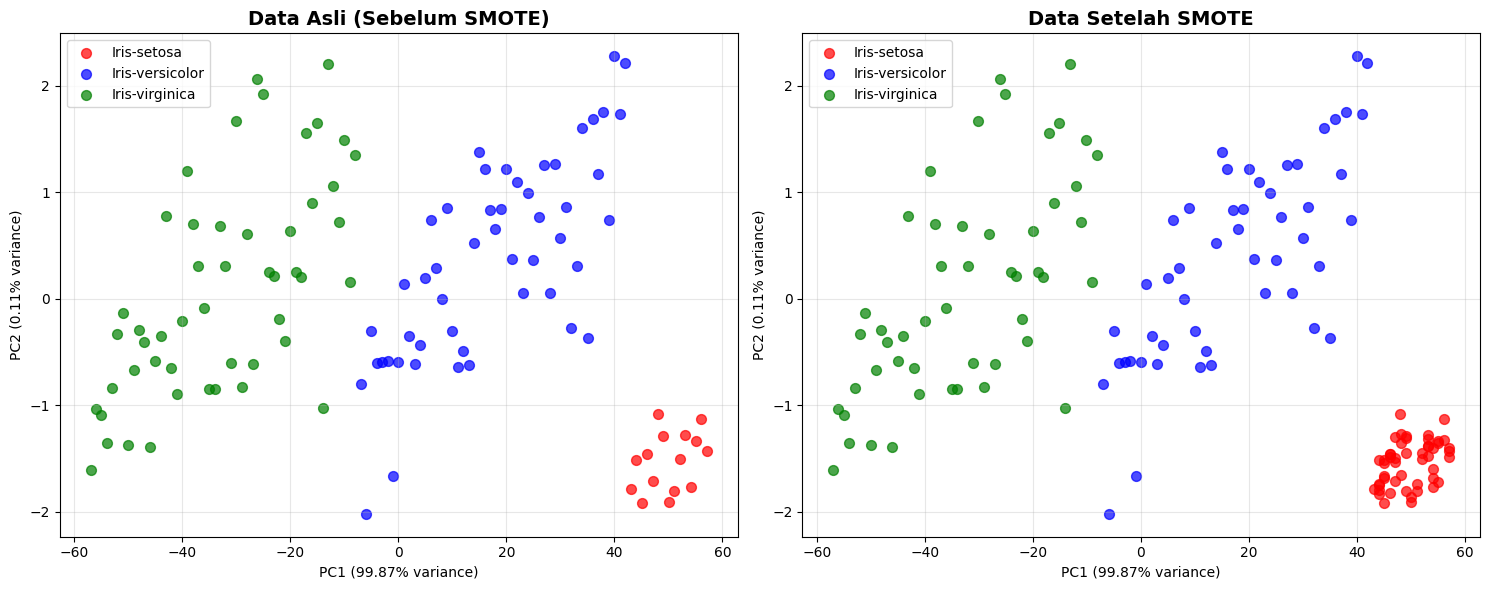


=== RINGKASAN HASIL SMOTE ===
• Data asli: 115 sampel dengan ketidakseimbangan kelas
• Data setelah SMOTE: 150 sampel dengan kelas yang seimbang
• Sampel sintetis yang dihasilkan: 35 sampel
• Semua kelas sekarang memiliki 50 sampel
• SMOTE berhasil menciptakan distribusi kelas yang seimbang!


In [7]:
# Visualisasi distribusi fitur setelah SMOTE menggunakan PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

print("\n=== VISUALISASI PCA DATA SETELAH SMOTE ===")

# Encode labels untuk visualisasi
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_resampled_encoded = le.transform(y_resampled)

# Terapkan PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_resampled = pca.transform(X_resampled)

# Buat subplot untuk perbandingan PCA
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

colors = ['red', 'blue', 'green']
species_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Plot data asli
for i, (color, label) in enumerate(zip(colors, species_labels)):
    mask = y_encoded == i
    axes[0].scatter(X_pca_original[mask, 0], X_pca_original[mask, 1], 
                   c=color, label=label, alpha=0.7, s=50)

axes[0].set_title('Data Asli (Sebelum SMOTE)', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot data setelah SMOTE
for i, (color, label) in enumerate(zip(colors, species_labels)):
    mask = y_resampled_encoded == i
    axes[1].scatter(X_pca_resampled[mask, 0], X_pca_resampled[mask, 1], 
                   c=color, label=label, alpha=0.7, s=50)

axes[1].set_title('Data Setelah SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== RINGKASAN HASIL SMOTE ===")
print(f"• Data asli: {len(y)} sampel dengan ketidakseimbangan kelas")
print(f"• Data setelah SMOTE: {len(y_resampled)} sampel dengan kelas yang seimbang")
print(f"• Sampel sintetis yang dihasilkan: {len(y_resampled) - len(y)} sampel")
print(f"• Semua kelas sekarang memiliki {after_values[0]} sampel")
print(f"• SMOTE berhasil menciptakan distribusi kelas yang seimbang!")